In [1]:
%load_ext autoreload
%autoreload 2

In [5]:
import circuitsvis as cv
from nnsight import LanguageModel

In [3]:
model = LanguageModel(
    "meta-llama/Llama-3.3-70B-Instruct",
    attn_implementation="eager"
)

In [4]:
model

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 8192)
    (layers): ModuleList(
      (0-79): 80 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=8192, out_features=8192, bias=False)
          (k_proj): Linear(in_features=8192, out_features=1024, bias=False)
          (v_proj): Linear(in_features=8192, out_features=1024, bias=False)
          (o_proj): Linear(in_features=8192, out_features=8192, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=8192, out_features=28672, bias=False)
          (up_proj): Linear(in_features=8192, out_features=28672, bias=False)
          (down_proj): Linear(in_features=28672, out_features=8192, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((8192,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((8192,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((8192,), eps=1e-05)
    (rotary_

In [8]:
prompt = "The sculpture is crafted out of clay. The vase is housed in the park. The sculpture is inside the gallery. The vase is made of marble.\nVase is to marble as sculpture is to"
with model.trace(prompt, output_attentions=True):
    # The attention patterns are now in the model's main output object.
    # model.output is a proxy to a CausalLMOutput object.
    # We access its 'attentions' attribute, which is a tuple of attention tensors for each layer.
    # We save the attention patterns from the first layer
    attn_patterns = model.output.attentions[0].save()

In [11]:
# After the trace, prepare the data for Circuitsvis
# 1. Get the string tokens for labeling the visualization
str_tokens = model.tokenizer.tokenize(prompt)
str_tokens = [s.replace("Ġ", " ") for s in str_tokens]
str_tokens = [s.replace("Ċ", " ") for s in str_tokens]

# 2. Get the saved attention tensor and remove the batch dimension
attention_tensor = attn_patterns.squeeze(0)

# Now, use circuitsvis to display the attention patterns
print("Llama-3.3-70B-Instruct Layer 0 Attention Head Patterns:")
cv.attention.attention_patterns(
    tokens=str_tokens,
    attention=attention_tensor
)

Llama-3.3-70B-Instruct Layer 0 Attention Head Patterns:


In [12]:
import os
os.chdir("/disk/u/gio/mechinterp/analogies5")

In [26]:
from src.visualization.attention import visualize_token_attention

prompt = """The sculpture is crafted out of clay.
The vase is housed in the park.
The sculpture is inside the gallery.
The vase is made of marble.
vase is to marble as sculpture is to"""

with model.trace(prompt, output_attentions=True):
    attention_output = model.output.attentions.save()

attentions_tensor = attention_output.squeeze(0)

AttributeError: 'tuple' object has no attribute 'squeeze'

In [43]:
attention_output[37]

tensor([[[[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [9.8579e-01, 1.4211e-02, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [9.1870e-01, 7.8314e-03, 7.3465e-02,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [5.2182e-01, 1.7668e-02, 3.3901e-03,  ..., 1.5544e-01,
           0.0000e+00, 0.0000e+00],
          [8.4421e-01, 8.4718e-03, 7.3239e-04,  ..., 1.6842e-02,
           3.3596e-02, 0.0000e+00],
          [4.8110e-01, 2.6729e-02, 1.1710e-03,  ..., 7.3650e-02,
           2.1959e-02, 6.4766e-02]],

         [[1.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [9.8240e-01, 1.7600e-02, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [9.1252e-01, 1.4420e-02, 7.3058e-02,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          ...,
          [3.9764e-01, 3.2676e-02, 6.1210e-04,  ..., 1.7023

In [51]:
attention_output[0][:, 18, -1, 1:][1]

IndexError: index 1 is out of bounds for dimension 0 with size 1

In [52]:
str_tokens = model.tokenizer.tokenize(prompt, add_special_tokens=True)
print(len(str_tokens))
str_tokens = [s.replace("Ġ", " ") for s in str_tokens]
str_tokens = [s.replace("Ċ", " ") for s in str_tokens]

visualize_token_attention(
    attn_output=attention_output,
    tokens=str_tokens,
    layer_indices=37,
    head_indices=18
)

40


'Layer 37. Head 18'

In [ ]:
import torch
from circuitsvis.tokens import colored_tokens

source_prompt = """The sculpture is crafted out of clay.
The sculpture is inside the gallery.
The vase is made of marble.
The vase is housed in the park.
sculpture is to vase as clay is to"""

with model.trace(prompt, output_attentions=True):
    attention_patterns = model.output.attentions.save()

In [58]:
attention_patterns[0].shape

torch.Size([1, 64, 40, 40])

In [48]:
# After the trace, prepare the data for Circuitsvis
# 1. Get the string tokens for labeling the visualization
str_tokens = model.tokenizer.tokenize(prompt)
str_tokens = [s.replace("Ġ", " ") for s in str_tokens]
str_tokens = [s.replace("Ċ", " ") for s in str_tokens]

# 2. Extract the attention scores for our specific head and token
# Shape: (batch, n_heads, seq_len, seq_len) -> (seq_len,)
attention_from_last_token = attention_patterns[0, 10, -1, :]

colored_tokens(
    tokens=str_tokens,
    values=attention_from_last_token
)

In [53]:
from src.visualization.attention import visualize_token_attention

visualize_token_attention(
    model=model,
    attention=attention_patterns,
    prompt=prompt,
    head_indices=[1,2,3,4,5,6]
)

In [70]:
from src.intervention.attention import get_attention_matrices

attention_information = get_attention_matrices(
    prompt,
    model
)

In [78]:
from src.visualization.attention import visualize_token_attention

visualize_token_attention(
    attention_information.attention_matrices,
    attention_information.tokenized_prompt,
    layer_indices=[33, 34, 35],
    head_indices=[10, 11, 12],
)

'Layer 33. Head 10'

'Layer 33. Head 11'

'Layer 33. Head 12'

'Layer 34. Head 10'

'Layer 34. Head 11'

'Layer 34. Head 12'

'Layer 35. Head 10'

'Layer 35. Head 11'

'Layer 35. Head 12'

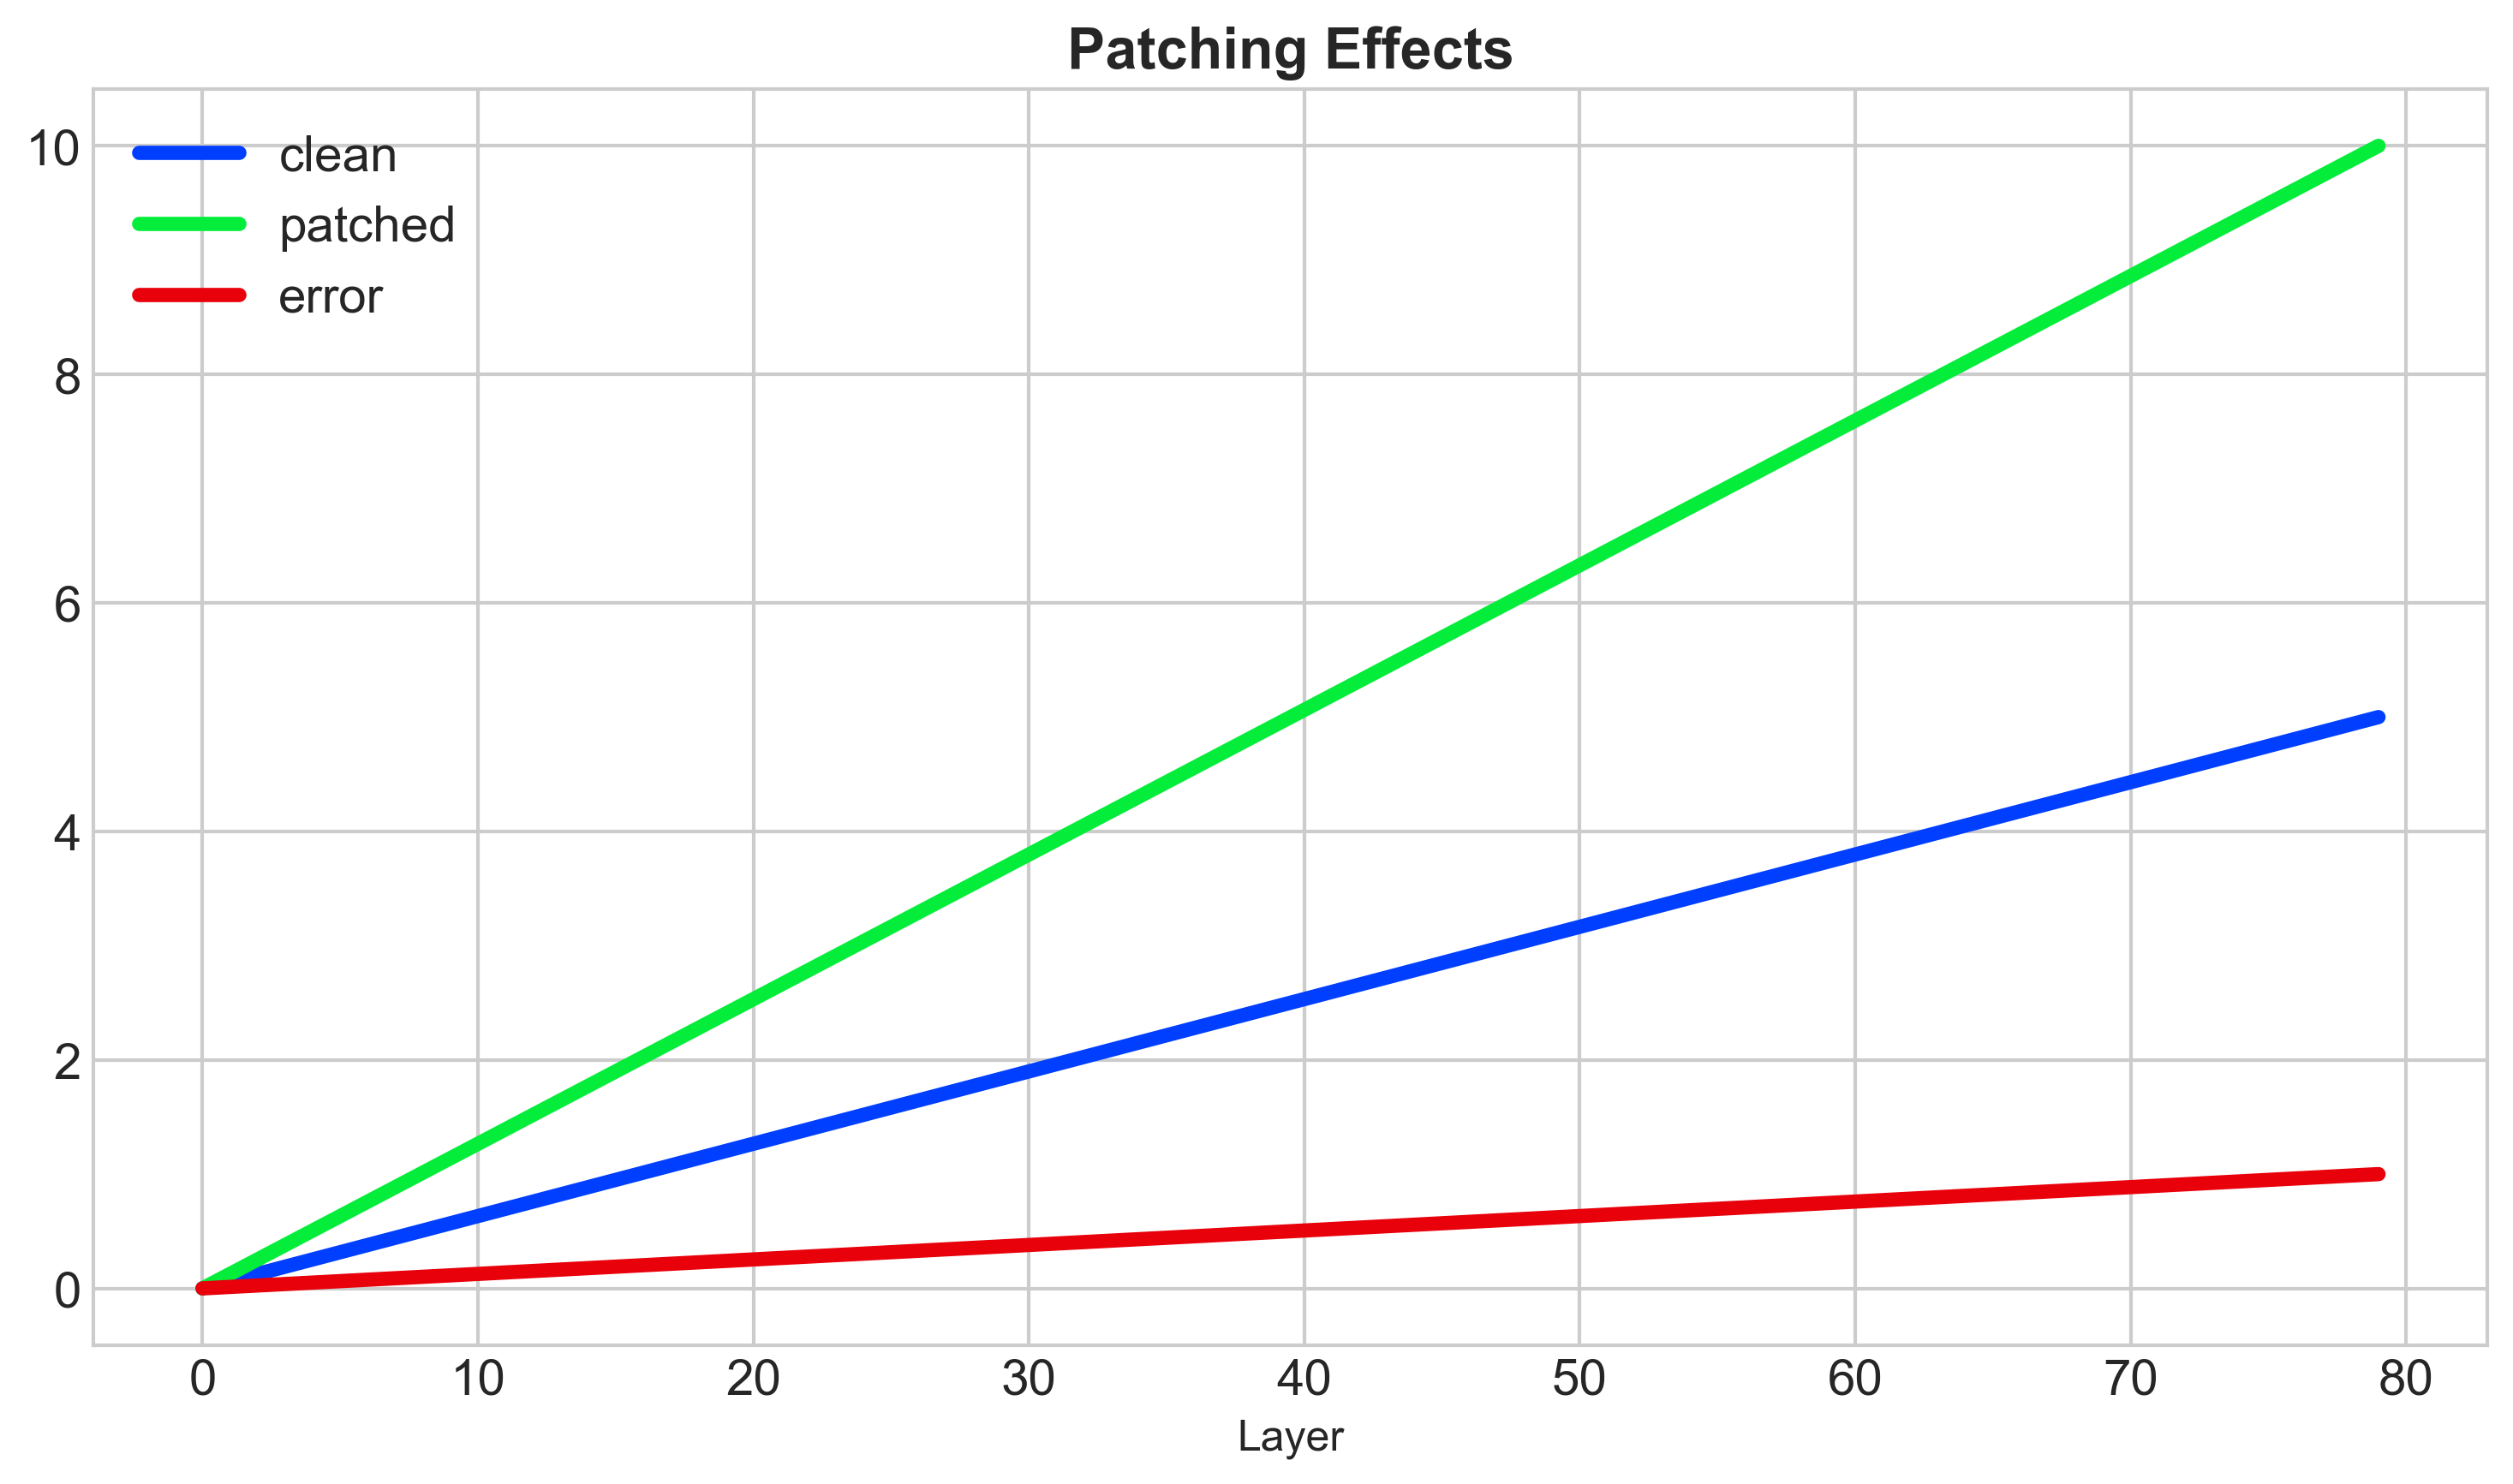

In [109]:
import numpy as np
from src.visualization.metrics import plot_metric_by_layer

num_layers = model.config.num_hidden_layers
layers = range(num_layers)

clean_run_data = np.linspace(0, 5, num_layers)

patched_run_data = np.linspace(0, 10, num_layers)

error_run_data = np.linspace(0, 1, num_layers)

plot_data = {
    "clean": clean_run_data,
    "patched": patched_run_data,
    "error": error_run_data
}

plot_metric_by_layer(
    data=plot_data,
    title="Patching Effects",
)